In [33]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import re
from google.colab import files

In [2]:
files.upload()

{}

In [34]:
data = pd.read_csv('/content/dataset_train_fix_labeled.csv')

# Keeping only the neccessary columns
data = data[['Sentences','Labels']]


In [35]:
data.head(10)

,Sentences,Labels
0,warung dimiliki pengusaha pabrik tahu sudah pu...,1
1,mohon ulama lurus k212 mmbri hujjah partai apa...,0
2,lokasi strategis jalan sumatera bandung temp...,1
3,betapa bahagia nya diri saat unboxing paket ba...,1
4,duh jadi mahasiswa jangan sombong dong kas...,2
5,makanan beragam harga makanan food stall dit...,1
6,pakai kartu kredit bca untung malah rugi besar,2
7,tempat unik bagus buat foto makanan enak ...,1
8,bersama keluarga baru menikmati pengalaman kul...,1
9,bersyukur,1


In [36]:
import string, re
def preprocess_data (text):
  #lower text
  text = text.lower()

  #hapus tanda baca
  remove = string.punctuation
  translator = str.maketrans(remove, ' '*len(remove))
  text = text.translate(translator)

  #hapus ASCII dan UNICODE
  text = text.encode('ascii', 'ignore').decode('utf-8')
  text = re.sub(r'[^\x00-\x7f]','r',text)

  #remove newline
  text = text.replace('\n', ' ')

  return text

In [6]:
data["Sentences"]= data['Sentences'].apply(preprocess_data)

In [7]:
max_features = 2000

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['Sentences'].values)
X = tokenizer.texts_to_sequences(data['Sentences'].values)
X = pad_sequences(X, 28) 

Y = pd.get_dummies(data['Labels']).values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [30]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(256,recurrent_dropout=0.5))
model.add(Dense(3,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])


In [27]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 28, 128)           256000    
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 28, 196)           254800    
_________________________________________________________________
lstm_18 (LSTM)               (None, 256)               463872    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 975,443
Trainable params: 975,443
Non-trainable params: 0
_________________________________________________________________


In [31]:
batch_size = 512

history=model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/20
9/9 [==============================] - 6s 279ms/step - loss: 0.9443 - accuracy: 0.6503 - val_loss: 0.7108 - val_accuracy: 0.7079
Epoch 2/20
9/9 [==============================] - 2s 233ms/step - loss: 0.7246 - accuracy: 0.6513 - val_loss: 0.6823 - val_accuracy: 0.6686
Epoch 3/20
9/9 [==============================] - 2s 228ms/step - loss: 0.6467 - accuracy: 0.7061 - val_loss: 0.6222 - val_accuracy: 0.7510
Epoch 4/20
9/9 [==============================] - 2s 230ms/step - loss: 0.5626 - accuracy: 0.7660 - val_loss: 0.5709 - val_accuracy: 0.7701
Epoch 5/20
9/9 [==============================] - 2s 222ms/step - loss: 0.5030 - accuracy: 0.7861 - val_loss: 0.5616 - val_accuracy: 0.7711
Epoch 6/20
9/9 [==============================] - 2s 235ms/step - loss: 0.4500 - accuracy: 0.7954 - val_loss: 0.5401 - val_accuracy: 0.7768
Epoch 7/20
9/9 [==============================] - 2s 229ms/step - loss: 0.3990 - accuracy: 0.8251 - val_loss: 0.4967 - val_accuracy: 0.8017
Epoch 8/20
9/9 [====

In [22]:
model.save('aplod_lite.h5')

In [23]:
files.download('aplod_lite.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

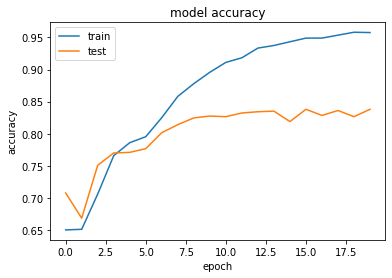

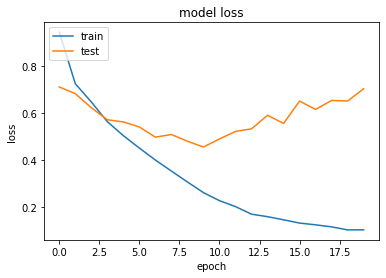

In [32]:
import matplotlib.pyplot as plt


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()